In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2
from tensorflow.keras.constraints import max_norm

from sklearn.feature_selection import mutual_info_regression,SelectKBest
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("clean_train.csv")
df

,id,Aerial Duels won,Age,Assists,Attacking options created,Attempted Passes,Blocks,Clearances,Country,Expected Goal Contributions,...,Progressive Passes,Progressive Carries,Shots,Successful Dribbles,Touches in attacking penalty area,Tackles,Value at beginning of 2020/21 season,Value at beginning of 2021/22 season,Value at beginning of 2022/23 season,Value at beginning of 2023/24 season
0,917,1.3,23,0.11,3.68,31.8,0.69,0.97,42,0.16,...,4.24,2.81,2.41,1.61,4.36,1.89,0.2,0.8,1.3,1.20
1,432,0.2,21,0.17,3.49,29.5,0.52,0.00,49,0.25,...,3.32,6.47,1.75,1.40,6.82,0.87,0.4,0.0,1.0,2.50
2,948,0.0,24,0.28,2.99,27.5,0.76,0.36,26,0.26,...,2.45,3.62,1.41,0.88,3.98,0.72,7.5,2.5,1.8,6.00
3,989,2.1,25,0.24,2.44,23.5,0.76,0.81,13,0.14,...,1.80,1.66,2.89,1.09,4.08,1.04,10.0,10.0,9.0,8.00
4,887,2.9,26,0.05,1.19,80.4,1.06,3.64,67,0.04,...,4.81,1.20,0.21,0.14,0.70,1.57,2.0,6.5,9.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,1130,0.5,28,0.26,3.41,59.8,0.73,1.62,40,0.20,...,6.54,1.57,1.20,0.63,2.04,1.15,5.0,4.5,5.5,4.00
1289,1294,0.3,31,0.00,4.01,42.4,0.81,0.29,61,0.17,...,4.33,1.98,2.13,0.29,2.94,1.32,25.0,25.0,25.0,14.00
1290,860,0.7,24,0.04,2.61,31.0,1.65,0.25,13,0.14,...,4.65,3.42,1.18,2.11,2.28,3.00,3.5,3.3,3.5,3.00
1291,1459,0.4,23,0.03,1.63,61.6,1.18,0.81,27,0.05,...,5.13,1.03,0.40,0.90,0.50,1.43,0.3,2.0,2.5,18.00


In [4]:
Y=df['Value at beginning of 2023/24 season']
Y

0        1.20
1        2.50
2        6.00
3        8.00
4       60.00
        ...  
1288     4.00
1289    14.00
1290     3.00
1291    18.00
1292     0.45
Name: Value at beginning of 2023/24 season, Length: 1293, dtype: float64

In [5]:
corr = df.corr()
corr

,id,Aerial Duels won,Age,Assists,Attacking options created,Attempted Passes,Blocks,Clearances,Country,Expected Goal Contributions,...,Progressive Passes,Progressive Carries,Shots,Successful Dribbles,Touches in attacking penalty area,Tackles,Value at beginning of 2020/21 season,Value at beginning of 2021/22 season,Value at beginning of 2022/23 season,Value at beginning of 2023/24 season
id,1.000000,0.008903,0.023748,-0.013974,-0.002280,0.051961,0.040293,-0.000493,0.037463,-0.026246,...,0.041480,0.015487,0.000877,-0.012840,-0.032322,0.057304,0.059064,0.055385,0.046696,0.011459
Aerial Duels won,0.008903,1.000000,0.134640,-0.217600,-0.402650,-0.119771,0.013885,0.384837,0.029082,-0.320868,...,-0.295648,-0.438655,-0.026110,-0.355822,0.037837,-0.178475,-0.043449,-0.052693,-0.057846,-0.103112
Age,0.023748,0.134640,1.000000,-0.066199,-0.043925,0.080432,-0.101564,0.072790,0.039752,-0.016706,...,0.096584,-0.204678,-0.052738,-0.260110,-0.052720,-0.123209,0.122225,-0.004682,-0.045891,-0.242998
Assists,-0.013974,-0.217600,-0.066199,1.000000,0.643691,-0.110094,-0.184147,-0.425760,-0.033400,0.756725,...,0.134826,0.472174,0.426580,0.399165,0.464310,-0.165618,0.202247,0.238810,0.233818,0.265516
Attacking options created,-0.002280,-0.402650,-0.043925,0.643691,1.000000,-0.089862,-0.240617,-0.705823,-0.046702,0.848645,...,0.364448,0.684656,0.611323,0.643441,0.550192,-0.074348,0.221986,0.245469,0.249243,0.279128
Attempted Passes,0.051961,-0.119771,0.080432,-0.110094,-0.089862,1.000000,0.229874,0.340860,-0.028657,-0.110956,...,0.698198,-0.069903,-0.523128,-0.222013,-0.561847,0.355026,0.113587,0.107914,0.108406,0.134894
Blocks,0.040293,0.013885,-0.101564,-0.184147,-0.240617,0.229874,1.000000,0.323549,-0.054908,-0.229593,...,0.113163,-0.181240,-0.356903,-0.126443,-0.344247,0.504965,-0.102080,-0.089114,-0.091806,-0.084732
Clearances,-0.000493,0.384837,0.072790,-0.425760,-0.705823,0.340860,0.323549,1.000000,-0.010113,-0.561811,...,-0.155393,-0.530406,-0.609022,-0.537453,-0.558663,0.125047,-0.108048,-0.123873,-0.129398,-0.169941
Country,0.037463,0.029082,0.039752,-0.033400,-0.046702,-0.028657,-0.054908,-0.010113,1.000000,-0.043311,...,-0.037701,-0.009937,-0.031680,-0.046654,-0.024163,-0.039097,-0.030445,-0.025849,-0.019371,-0.061261
Expected Goal Contributions,-0.026246,-0.320868,-0.016706,0.756725,0.848645,-0.110956,-0.229593,-0.561811,-0.043311,1.000000,...,0.231702,0.616600,0.537228,0.517031,0.547397,-0.144263,0.245131,0.269398,0.263869,0.274200


In [6]:
corr['Value at beginning of 2023/24 season'] = abs(corr['Value at beginning of 2023/24 season'])
corr['Value at beginning of 2023/24 season'] 

id                                      0.011459
Aerial Duels won                        0.103112
Age                                     0.242998
Assists                                 0.265516
Attacking options created               0.279128
Attempted Passes                        0.134894
Blocks                                  0.084732
Clearances                              0.169941
Country                                 0.061261
Expected Goal Contributions             0.274200
Interceptions                           0.123360
Open Play Goals                         0.348093
Open Play Expected Goals                0.307401
Percentage of Passes Completed          0.170436
Progressive Passes Rec                  0.215076
Progressive Passes                      0.190763
Progressive Carries                     0.250899
Shots                                   0.258504
Successful Dribbles                     0.213402
Touches in attacking penalty area       0.309214
Tackles             

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\1834311597.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(corr['Value at beginning of 2023/24 season'])


<Axes: xlabel='Value at beginning of 2023/24 season', ylabel='Density'>

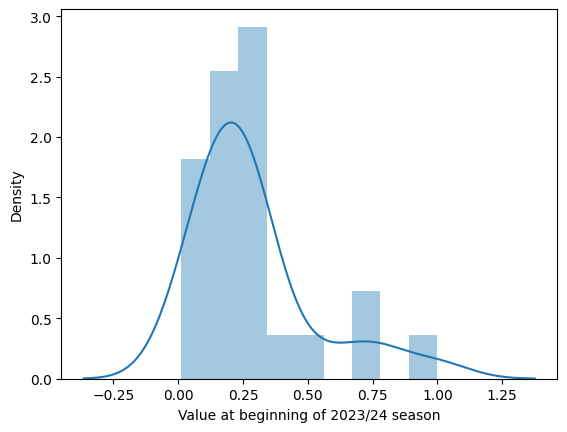

In [7]:
sns.distplot(corr['Value at beginning of 2023/24 season'])

In [8]:
corr.drop(['Value at beginning of 2023/24 season'],axis=0,inplace=True)

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\1834311597.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(corr['Value at beginning of 2023/24 season'])


<Axes: xlabel='Value at beginning of 2023/24 season', ylabel='Density'>

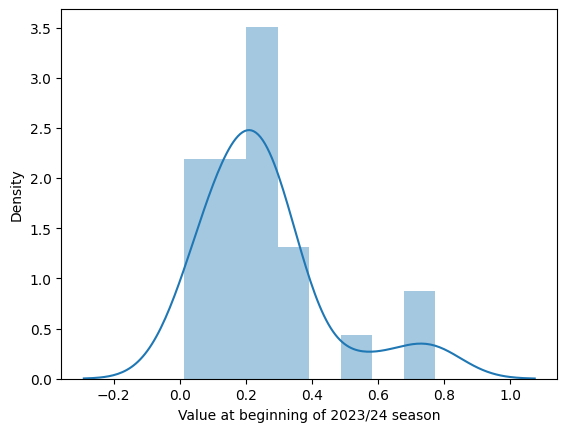

In [9]:
sns.distplot(corr['Value at beginning of 2023/24 season'])

In [10]:
feature1=list(corr[corr['Value at beginning of 2023/24 season']>=0.3].index)
feature1

['Open Play Goals',
 'Open Play Expected Goals',
 'Touches in attacking penalty area',
 'Value at beginning of 2020/21 season',
 'Value at beginning of 2021/22 season',
 'Value at beginning of 2022/23 season']

In [11]:
feature2=list(corr[corr['Value at beginning of 2023/24 season']>=0.4].index)
feature2

['Value at beginning of 2020/21 season',
 'Value at beginning of 2021/22 season',
 'Value at beginning of 2022/23 season']

In [12]:
mutual_info = mutual_info_regression(df.drop(['Value at beginning of 2023/24 season'],axis=1),Y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = df.drop(['Value at beginning of 2023/24 season'],axis=1).columns
mutual_info.sort_values(ascending=False)

Value at beginning of 2022/23 season    0.519487
Value at beginning of 2021/22 season    0.392088
Value at beginning of 2020/21 season    0.175324
Age                                     0.088006
Country                                 0.074053
Attacking options created               0.063017
Open Play Expected Goals                0.056974
Shots                                   0.052348
Open Play Goals                         0.050656
id                                      0.048382
Successful Dribbles                     0.046389
Progressive Passes Rec                  0.042762
Expected Goal Contributions             0.039648
Attempted Passes                        0.039143
Touches in attacking penalty area       0.030917
Progressive Passes                      0.027499
Progressive Carries                     0.027217
Interceptions                           0.019610
Assists                                 0.019091
Aerial Duels won                        0.015277
Tackles             

In [13]:
feature3 = list(mutual_info[mutual_info>=0.05].index)
feature3

['Age',
 'Attacking options created',
 'Country',
 'Open Play Goals',
 'Open Play Expected Goals',
 'Shots',
 'Value at beginning of 2020/21 season',
 'Value at beginning of 2021/22 season',
 'Value at beginning of 2022/23 season']

In [14]:
feature4 = list(mutual_info[mutual_info>0.06].index)
feature4

['Age',
 'Attacking options created',
 'Country',
 'Value at beginning of 2020/21 season',
 'Value at beginning of 2021/22 season',
 'Value at beginning of 2022/23 season']

# Different Data

In [15]:
print(feature1)
print(feature2)
print(feature3)
print(feature4)

['Open Play Goals', 'Open Play Expected Goals', 'Touches in attacking penalty area', 'Value at beginning of 2020/21 season', 'Value at beginning of 2021/22 season', 'Value at beginning of 2022/23 season']
['Value at beginning of 2020/21 season', 'Value at beginning of 2021/22 season', 'Value at beginning of 2022/23 season']
['Age', 'Attacking options created', 'Country', 'Open Play Goals', 'Open Play Expected Goals', 'Shots', 'Value at beginning of 2020/21 season', 'Value at beginning of 2021/22 season', 'Value at beginning of 2022/23 season']
['Age', 'Attacking options created', 'Country', 'Value at beginning of 2020/21 season', 'Value at beginning of 2021/22 season', 'Value at beginning of 2022/23 season']


In [16]:
X1 = df[feature1]
X2 = df[feature2]
X3 = df[feature3]
X4 = df[feature4]

print('x1 : ',X1.shape)
print('x2 : ',X2.shape)
print('x3 : ',X3.shape)
print('x4 : ',X4.shape)

x1 :  (1293, 6)
x2 :  (1293, 3)
x3 :  (1293, 9)
x4 :  (1293, 6)


# X1 - Scaling:

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\1358238162.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X1[col])


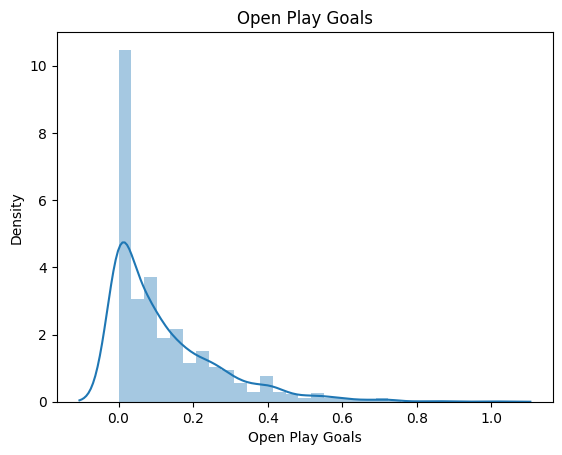

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\1358238162.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X1[col])


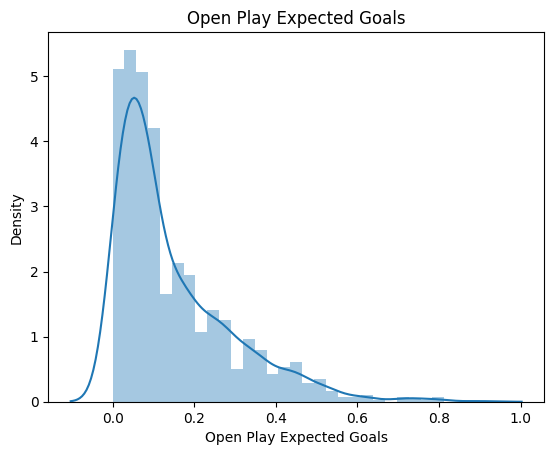

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\1358238162.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X1[col])


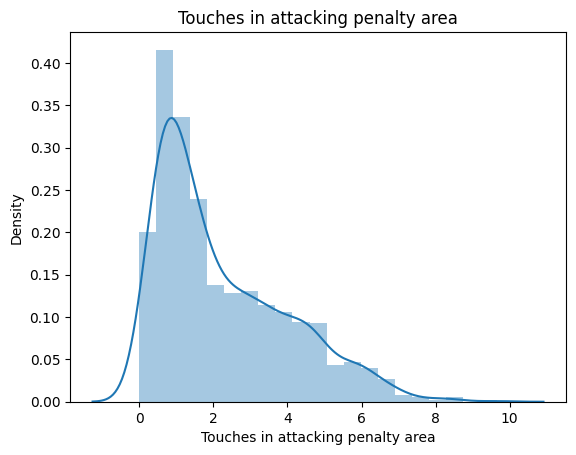

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\1358238162.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X1[col])


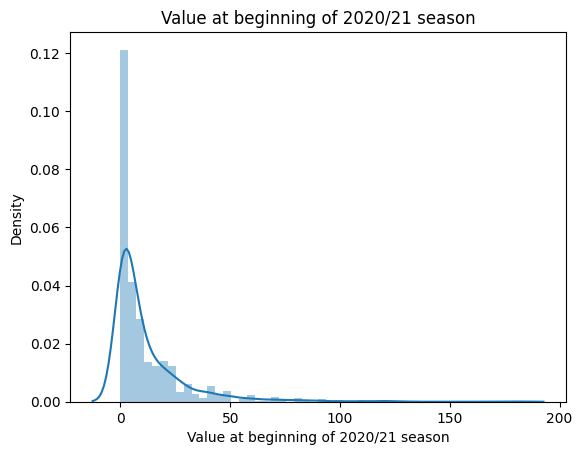

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\1358238162.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X1[col])


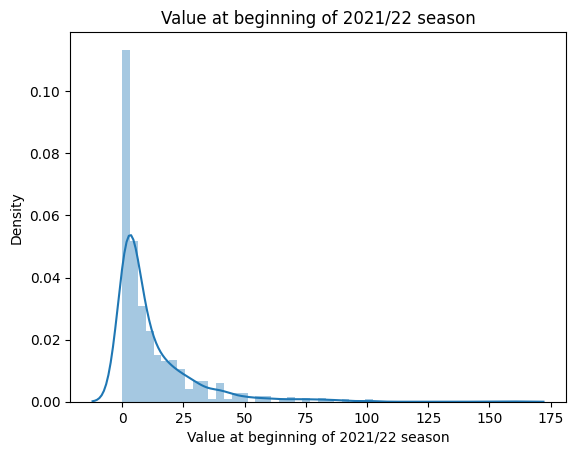

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\1358238162.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X1[col])


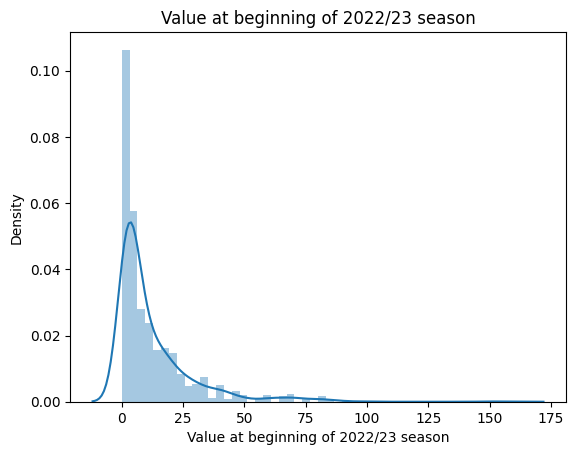

In [17]:
for col in feature1:
    plt.title(col)
    sns.distplot(X1[col])
    plt.show()

None of them are in normal distribution. Hence x1 needs Standardization

In [18]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [19]:
sc = StandardScaler()
sc.fit(X1)
x1=sc.transform(X1)
x1

array([[-0.42613718,  0.3602777 ,  1.20644872, -0.65247888, -0.68064121,
        -0.67048529],
       [-0.83559621,  0.0813739 ,  2.60243258, -0.64119022, -0.72798618,
        -0.68855992],
       [-0.01667815,  0.3602777 ,  0.99080894, -0.24044279, -0.58003314,
        -0.64036091],
       ...,
       [-0.83559621, -0.54615964,  0.02610464, -0.46621599, -0.53268817,
        -0.53793802],
       [-0.63086669, -0.82506343, -0.9839975 , -0.64683455, -0.60962375,
        -0.59818678],
       [ 0.1198082 ,  0.15109985, -0.41652439, -0.60732424, -0.66880497,
        -0.68855992]])

# X2 - Scalling :

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\1053247856.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X2[col])


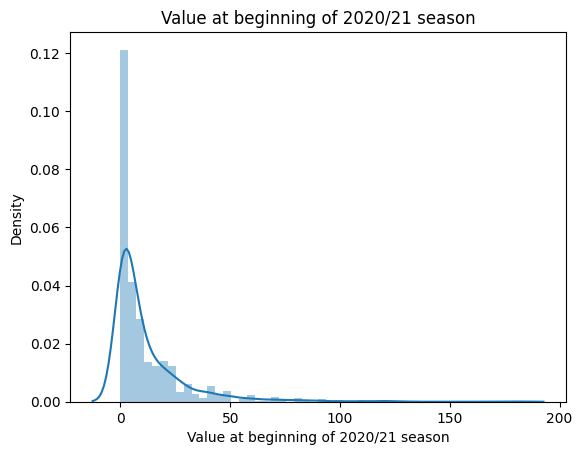

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\1053247856.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X2[col])


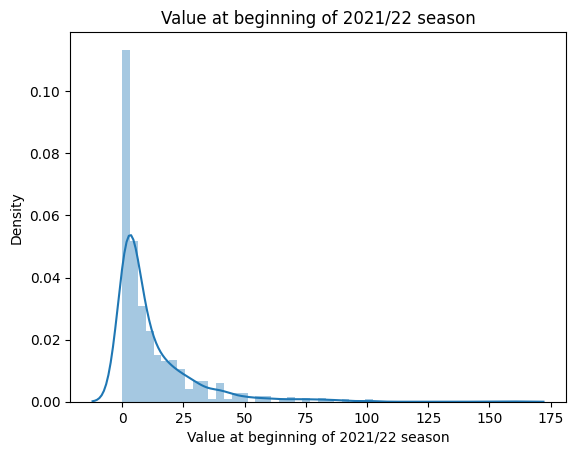

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\1053247856.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X2[col])


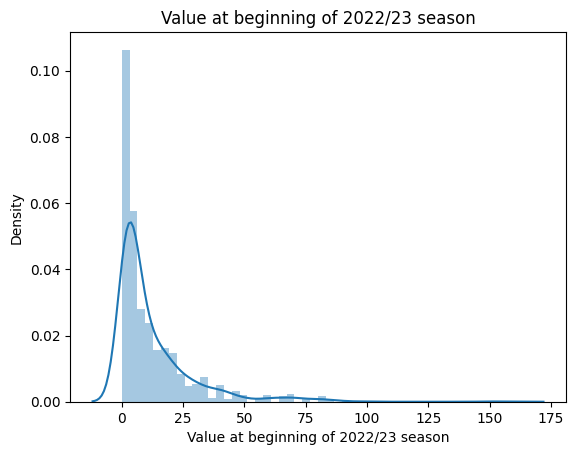

In [20]:
for col in feature2:
    plt.title(col)
    sns.distplot(X2[col])
    plt.show()

it needs Standardization

In [21]:
sc = StandardScaler()
sc.fit(X2)
x2 = sc.transform(X2)
x2

array([[-0.65247888, -0.68064121, -0.67048529],
       [-0.64119022, -0.72798618, -0.68855992],
       [-0.24044279, -0.58003314, -0.64036091],
       ...,
       [-0.46621599, -0.53268817, -0.53793802],
       [-0.64683455, -0.60962375, -0.59818678],
       [-0.60732424, -0.66880497, -0.68855992]])

# X3 - Scalling :

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\582516694.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X3[col])


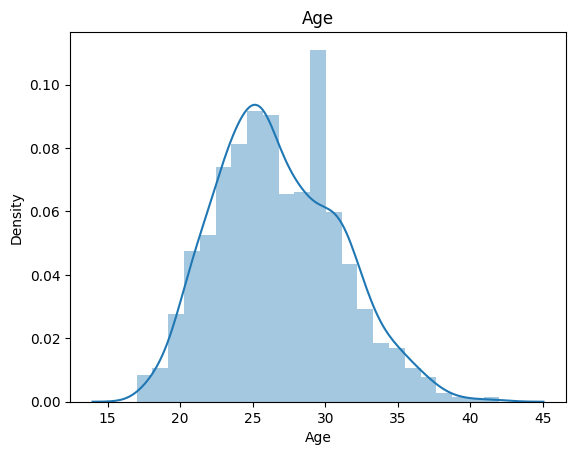

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\582516694.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X3[col])


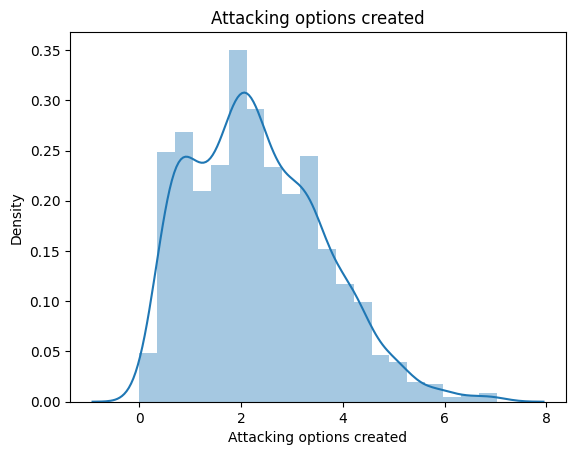

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\582516694.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X3[col])


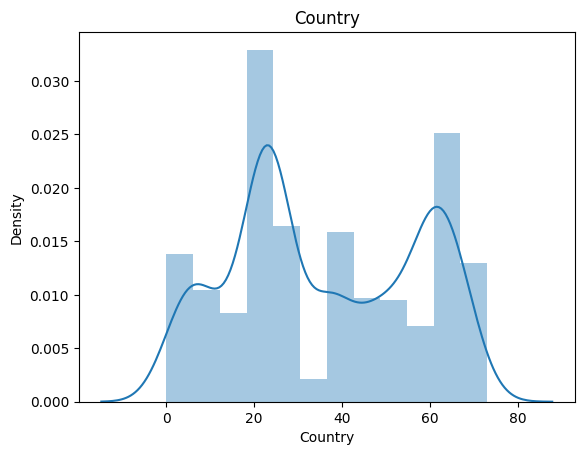

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\582516694.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X3[col])


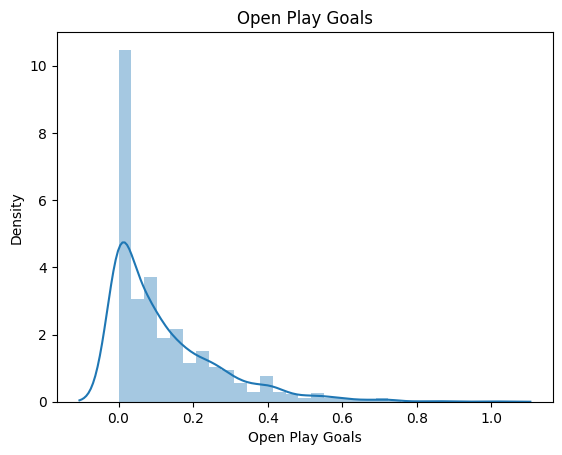

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\582516694.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X3[col])


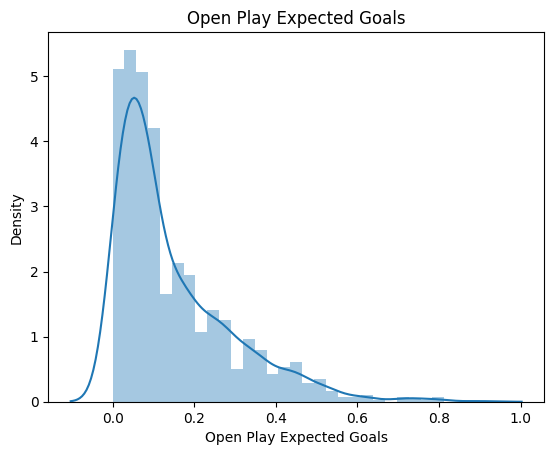

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\582516694.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X3[col])


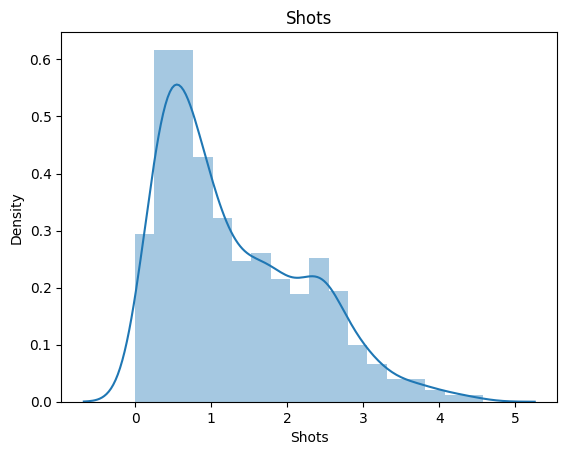

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\582516694.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X3[col])


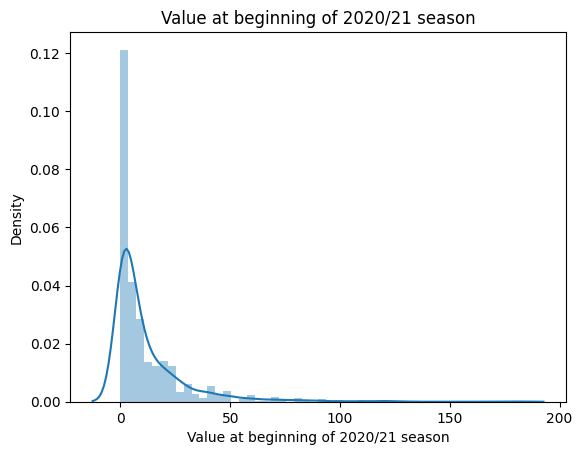

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\582516694.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X3[col])


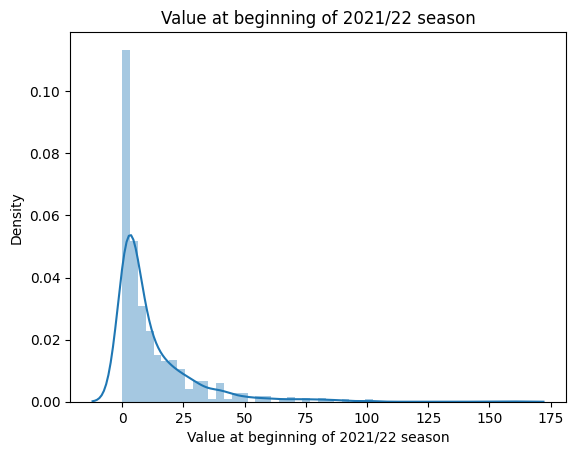

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\582516694.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X3[col])


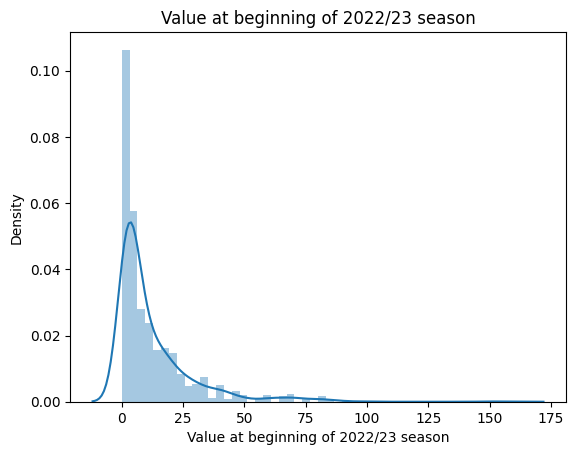

In [22]:
for col in feature3:
    plt.title(col)
    sns.distplot(X3[col])
    plt.show()

In [23]:
sc = StandardScaler()
sc.fit(X3)
x3 = sc.transform(X3)
x3

array([[-0.88400924,  1.05230576,  0.30054836, ..., -0.65247888,
        -0.68064121, -0.67048529],
       [-1.3549709 ,  0.90468299,  0.63947973, ..., -0.64119022,
        -0.72798618, -0.68855992],
       [-0.64852841,  0.516202  , -0.47415192, ..., -0.24044279,
        -0.58003314, -0.64036091],
       ...,
       [-0.64852841,  0.22095645, -1.10359589, ..., -0.46621599,
        -0.53268817, -0.53793802],
       [-0.88400924, -0.54046629, -0.42573315, ..., -0.64683455,
        -0.60962375, -0.59818678],
       [ 0.9998374 , -0.13644606, -1.6846211 , ..., -0.60732424,
        -0.66880497, -0.68855992]])

# X4 - Scalling :

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\945284208.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X4[col])


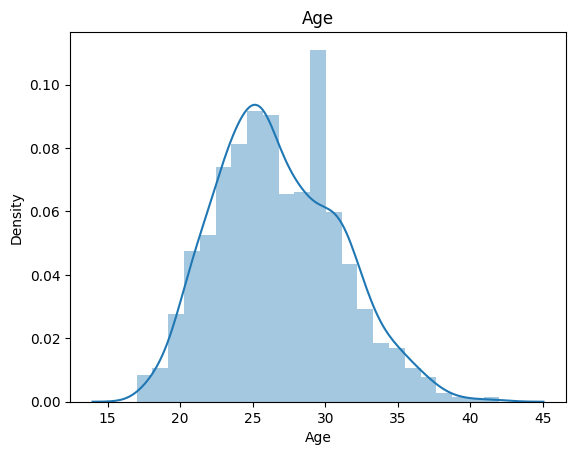

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\945284208.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X4[col])


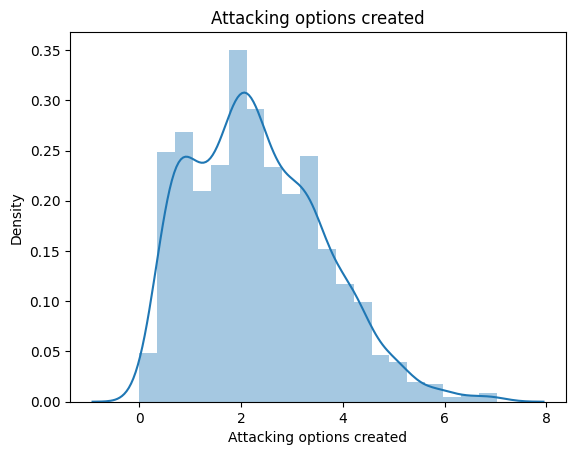

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\945284208.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X4[col])


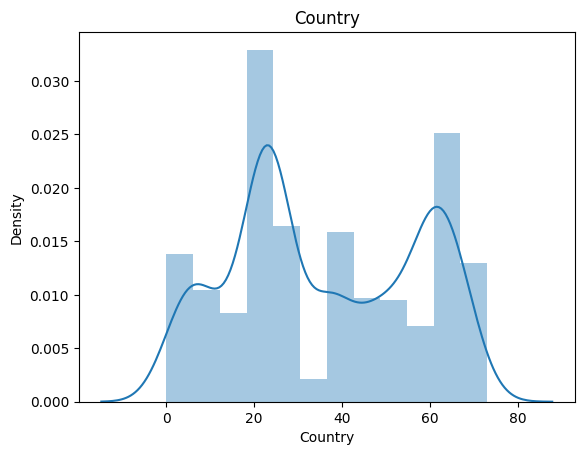

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\945284208.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X4[col])


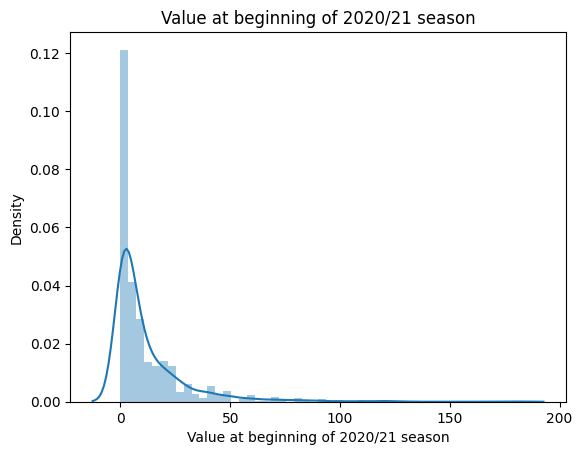

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\945284208.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X4[col])


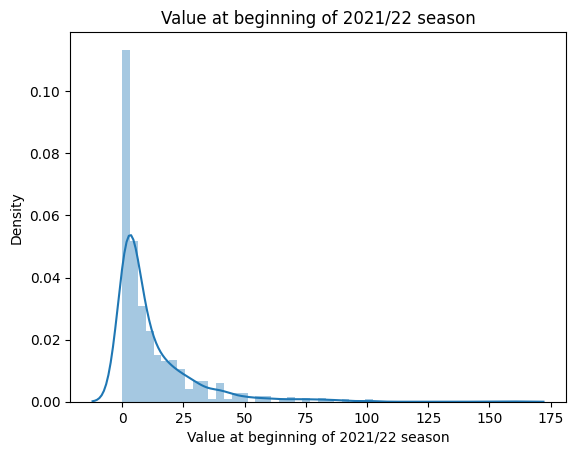

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\945284208.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X4[col])


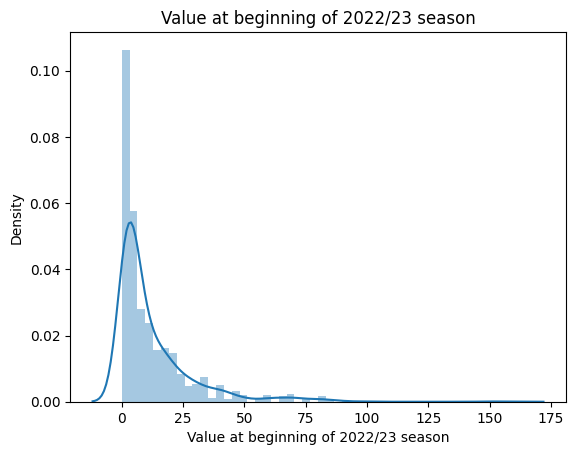

In [24]:
for col in feature4:
    plt.title(col)
    sns.distplot(X4[col])
    plt.show()

In [25]:
sc = StandardScaler()
sc.fit(X4)
x4 = sc.transform(X4)
x4

array([[-0.88400924,  1.05230576,  0.30054836, -0.65247888, -0.68064121,
        -0.67048529],
       [-1.3549709 ,  0.90468299,  0.63947973, -0.64119022, -0.72798618,
        -0.68855992],
       [-0.64852841,  0.516202  , -0.47415192, -0.24044279, -0.58003314,
        -0.64036091],
       ...,
       [-0.64852841,  0.22095645, -1.10359589, -0.46621599, -0.53268817,
        -0.53793802],
       [-0.88400924, -0.54046629, -0.42573315, -0.64683455, -0.60962375,
        -0.59818678],
       [ 0.9998374 , -0.13644606, -1.6846211 , -0.60732424, -0.66880497,
        -0.68855992]])

# Experiment on x1:

In [26]:
x_train, x_test, y_train,y_test = train_test_split(x1, Y,test_size = 0.25, random_state = 123)

In [27]:
# SVR
model=SVR()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nSVC\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")


# Random Forest Regressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nRandom Forest Reg\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")

# KNN Regressr
model=KNeighborsRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nKNN Regressor\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")

#XGB Regressor
model=XGBRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nXgb Regressor\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")

# Decesion Tree Regressor 
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nDecesion Tree Regressor\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")

# Linear Regression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nLinear Regressor\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")



SVC

Training Data : 
MSE : 222.84417607358097
Testing Data : 
MSE : 356.95373008229654


Random Forest Reg

Training Data : 
MSE : 21.541538581527345
Testing Data : 
MSE : 171.11531314969136


KNN Regressor

Training Data : 
MSE : 109.36243673890608
Testing Data : 
MSE : 200.49863950617285


Xgb Regressor

Training Data : 
MSE : 0.9941093574249958
Testing Data : 
MSE : 188.40126841583168


Decesion Tree Regressor

Training Data : 
MSE : 4.7701051254173024e-35
Testing Data : 
MSE : 329.8598148148148


Linear Regressor

Training Data : 
MSE : 121.85469365701634
Testing Data : 
MSE : 128.03580152193328


Decisions : 
   1. Xgb,Decesion Tree and Random Forest overfits the data
   2. svr and knn result is not satisfactory
   3. Linear Regression gives good result but not satisfactory

# Experiment on x2:

In [28]:
.shape

SyntaxError: invalid syntax (1189770672.py, line 1)

In [30]:
x_train, x_test, y_train,y_test = train_test_split(x2, Y,test_size = 0.25, random_state = 123)

# SVR
model=SVR()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nSVC\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")


# Random Forest Regressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nRandom Forest Reg\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")

# KNN Regressr
model=KNeighborsRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nKNN Regressor\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")

#XGB Regressor
model=XGBRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nXgb Regressor\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")

# Decesion Tree Regressor 
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nDecesion Tree Regressor\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")

# Linear Regression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nLinear Regressor\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")



SVC

Training Data : 
MSE : 204.38036707180402
Testing Data : 
MSE : 324.5373923127359


Random Forest Reg

Training Data : 
MSE : 29.459493122216703
Testing Data : 
MSE : 173.99506562010427


KNN Regressor

Training Data : 
MSE : 113.02166429308566
Testing Data : 
MSE : 195.49771327160494


Xgb Regressor

Training Data : 
MSE : 12.479269060743365
Testing Data : 
MSE : 205.09532916274802


Decesion Tree Regressor

Training Data : 
MSE : 4.683565101479188
Testing Data : 
MSE : 317.0145192472565


Linear Regressor

Training Data : 
MSE : 127.84475817435677
Testing Data : 
MSE : 138.27567377564313


# Experiment on x3:

In [31]:
x_train, x_test, y_train,y_test = train_test_split(x3, Y,test_size = 0.25, random_state = 123)

# SVR
model=SVR()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nSVC\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")


# Random Forest Regressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nRandom Forest Reg\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")

# KNN Regressr
model=KNeighborsRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nKNN Regressor\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")

#XGB Regressor
model=XGBRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nXgb Regressor\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")

# Decesion Tree Regressor 
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nDecesion Tree Regressor\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")

# Linear Regression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nLinear Regressor\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")



SVC

Training Data : 
MSE : 223.09831065722767
Testing Data : 
MSE : 363.2439877712398


Random Forest Reg

Training Data : 
MSE : 18.04754852012384
Testing Data : 
MSE : 142.05723843518518


KNN Regressor

Training Data : 
MSE : 100.26357450980393
Testing Data : 
MSE : 195.60608950617285


Xgb Regressor

Training Data : 
MSE : 0.32240444458853273
Testing Data : 
MSE : 152.57057868537032


Decesion Tree Regressor

Training Data : 
MSE : 4.7701051254173024e-35
Testing Data : 
MSE : 329.7732793209876


Linear Regressor

Training Data : 
MSE : 112.21781926589505
Testing Data : 
MSE : 116.24498556927446


# Experiment on x4

In [32]:
x_train, x_test, y_train,y_test = train_test_split(x4, Y,test_size = 0.25, random_state = 123)

# SVR
model=SVR()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nSVC\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")


# Random Forest Regressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nRandom Forest Reg\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")

# KNN Regressr
model=KNeighborsRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nKNN Regressor\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")

#XGB Regressor
model=XGBRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nXgb Regressor\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")

# Decesion Tree Regressor 
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nDecesion Tree Regressor\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")

# Linear Regression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y=model.predict(x_train)

print("\n\nLinear Regressor\n\nTraining Data : ")
print(f"MSE : {MSE(y_pred=y,y_true=y_train)}")
print("Testing Data : ")
print(f"MSE : {MSE(y_pred=y_pred,y_true=y_test)}")



SVC

Training Data : 
MSE : 217.1181842818078
Testing Data : 
MSE : 356.6949193110861


Random Forest Reg

Training Data : 
MSE : 19.347092895545163
Testing Data : 
MSE : 147.36085203950617


KNN Regressor

Training Data : 
MSE : 96.85262291021672
Testing Data : 
MSE : 182.42819907407406


Xgb Regressor

Training Data : 
MSE : 1.0282647424315703
Testing Data : 
MSE : 154.73643091679858


Decesion Tree Regressor

Training Data : 
MSE : 0.001671826625386997
Testing Data : 
MSE : 301.6972530864198


Linear Regressor

Training Data : 
MSE : 116.58128360326658
Testing Data : 
MSE : 124.32667388051773


In [33]:
feature4

['Age',
 'Attacking options created',
 'Country',
 'Value at beginning of 2020/21 season',
 'Value at beginning of 2021/22 season',
 'Value at beginning of 2022/23 season']

In [74]:
test=pd.read_csv('clean_test.csv')
test

,id,Aerial Duels won,Age,Assists,Attacking options created,Attempted Passes,Blocks,Clearances,Country,Expected Goal Contributions,...,Progressive Passes Rec,Progressive Passes,Progressive Carries,Shots,Successful Dribbles,Touches in attacking penalty area,Tackles,Value at beginning of 2020/21 season,Value at beginning of 2021/22 season,Value at beginning of 2022/23 season
0,705,2.6,28,0.03,0.95,47.2,1.13,3.44,10,0.01,...,0.69,4.04,0.58,0.35,0.32,0.95,1.53,2.5,3.0,4.0
1,809,0.3,28,0.10,3.22,50.5,0.79,1.73,15,0.18,...,3.62,3.96,1.78,0.69,0.74,0.84,1.34,1.7,4.0,7.0
2,1432,0.7,26,0.03,2.34,47.5,1.08,1.56,32,0.08,...,1.22,5.72,2.00,0.81,1.69,0.64,1.49,1.2,3.0,3.5
3,173,1.6,26,0.12,1.98,50.2,1.40,2.32,41,0.22,...,7.50,3.11,3.05,0.55,0.61,2.87,2.32,4.8,3.5,3.0
4,513,0.4,30,0.38,5.12,46.3,1.04,1.15,5,0.35,...,5.64,6.10,2.46,1.96,1.27,1.73,0.81,4.0,3.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1220,0.9,28,0.00,0.60,38.0,1.95,2.41,28,0.01,...,1.49,3.10,0.80,0.23,0.00,0.23,2.76,4.2,3.0,2.0
405,478,0.6,28,0.10,1.40,43.3,1.50,2.62,32,0.04,...,2.44,2.65,1.74,0.21,0.59,1.01,1.60,3.5,2.5,3.0
406,798,2.9,33,0.00,1.12,61.4,1.30,2.37,2,0.04,...,0.36,3.44,0.36,0.71,0.24,1.07,2.73,10.0,9.0,7.5
407,1563,1.5,26,0.00,2.43,34.2,1.00,1.22,47,0.05,...,8.40,2.74,2.61,2.00,1.39,2.61,1.44,1.0,1.5,3.0


In [75]:
ID = test['id']

In [76]:
test.isnull().sum()

id                                      0
Aerial Duels won                        0
Age                                     0
Assists                                 0
Attacking options created               0
Attempted Passes                        0
Blocks                                  0
Clearances                              0
Country                                 0
Expected Goal Contributions             0
Interceptions                           0
Open Play Goals                         0
Open Play Expected Goals                0
Percentage of Passes Completed          0
Progressive Passes Rec                  0
Progressive Passes                      0
Progressive Carries                     0
Shots                                   0
Successful Dribbles                     0
Touches in attacking penalty area       0
Tackles                                 0
Value at beginning of 2020/21 season    0
Value at beginning of 2021/22 season    0
Value at beginning of 2022/23 seas

In [62]:
test=test[feature4]
test

,Age,Attacking options created,Country,Value at beginning of 2020/21 season,Value at beginning of 2021/22 season,Value at beginning of 2022/23 season,id
0,28,0.95,10,2.5,3.0,4.0,705
1,28,3.22,15,1.7,4.0,7.0,809
2,26,2.34,32,1.2,3.0,3.5,1432
3,26,1.98,41,4.8,3.5,3.0,173
4,30,5.12,5,4.0,3.5,3.5,513
...,...,...,...,...,...,...,...
404,28,0.60,28,4.2,3.0,2.0,1220
405,28,1.40,32,3.5,2.5,3.0,478
406,33,1.12,2,10.0,9.0,7.5,798
407,26,2.43,47,1.0,1.5,3.0,1563


In [64]:
X4['id']=df['id'].copy()

C:\Users\idipa\AppData\Local\Temp\ipykernel_1488\3923293024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X4['id']=df['id'].copy()


In [65]:
no_row=1293
X4

,Age,Attacking options created,Country,Value at beginning of 2020/21 season,Value at beginning of 2021/22 season,Value at beginning of 2022/23 season,id
0,23,3.68,42,0.2,0.8,1.3,917
1,21,3.49,49,0.4,0.0,1.0,432
2,24,2.99,26,7.5,2.5,1.8,948
3,25,2.44,13,10.0,10.0,9.0,989
4,26,1.19,67,2.0,6.5,9.0,887
...,...,...,...,...,...,...,...
1288,28,3.41,40,5.0,4.5,5.5,1130
1289,31,4.01,61,25.0,25.0,25.0,1294
1290,24,2.61,13,3.5,3.3,3.5,860
1291,23,1.63,27,0.3,2.0,2.5,1459


In [79]:
DF=pd.concat((df.drop(['Value at beginning of 2023/24 season'],axis=1),test),axis=0)
DF

,id,Aerial Duels won,Age,Assists,Attacking options created,Attempted Passes,Blocks,Clearances,Country,Expected Goal Contributions,...,Progressive Passes Rec,Progressive Passes,Progressive Carries,Shots,Successful Dribbles,Touches in attacking penalty area,Tackles,Value at beginning of 2020/21 season,Value at beginning of 2021/22 season,Value at beginning of 2022/23 season
0,917,1.3,23,0.11,3.68,31.8,0.69,0.97,42,0.16,...,8.60,4.24,2.81,2.41,1.61,4.36,1.89,0.2,0.8,1.3
1,432,0.2,21,0.17,3.49,29.5,0.52,0.00,49,0.25,...,8.21,3.32,6.47,1.75,1.40,6.82,0.87,0.4,0.0,1.0
2,948,0.0,24,0.28,2.99,27.5,0.76,0.36,26,0.26,...,6.95,2.45,3.62,1.41,0.88,3.98,0.72,7.5,2.5,1.8
3,989,2.1,25,0.24,2.44,23.5,0.76,0.81,13,0.14,...,5.46,1.80,1.66,2.89,1.09,4.08,1.04,10.0,10.0,9.0
4,887,2.9,26,0.05,1.19,80.4,1.06,3.64,67,0.04,...,0.19,4.81,1.20,0.21,0.14,0.70,1.57,2.0,6.5,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1220,0.9,28,0.00,0.60,38.0,1.95,2.41,28,0.01,...,1.49,3.10,0.80,0.23,0.00,0.23,2.76,4.2,3.0,2.0
405,478,0.6,28,0.10,1.40,43.3,1.50,2.62,32,0.04,...,2.44,2.65,1.74,0.21,0.59,1.01,1.60,3.5,2.5,3.0
406,798,2.9,33,0.00,1.12,61.4,1.30,2.37,2,0.04,...,0.36,3.44,0.36,0.71,0.24,1.07,2.73,10.0,9.0,7.5
407,1563,1.5,26,0.00,2.43,34.2,1.00,1.22,47,0.05,...,8.40,2.74,2.61,2.00,1.39,2.61,1.44,1.0,1.5,3.0


In [81]:
DF[:][:no_row]

,id,Aerial Duels won,Age,Assists,Attacking options created,Attempted Passes,Blocks,Clearances,Country,Expected Goal Contributions,...,Progressive Passes Rec,Progressive Passes,Progressive Carries,Shots,Successful Dribbles,Touches in attacking penalty area,Tackles,Value at beginning of 2020/21 season,Value at beginning of 2021/22 season,Value at beginning of 2022/23 season
0,917,1.3,23,0.11,3.68,31.8,0.69,0.97,42,0.16,...,8.60,4.24,2.81,2.41,1.61,4.36,1.89,0.2,0.8,1.3
1,432,0.2,21,0.17,3.49,29.5,0.52,0.00,49,0.25,...,8.21,3.32,6.47,1.75,1.40,6.82,0.87,0.4,0.0,1.0
2,948,0.0,24,0.28,2.99,27.5,0.76,0.36,26,0.26,...,6.95,2.45,3.62,1.41,0.88,3.98,0.72,7.5,2.5,1.8
3,989,2.1,25,0.24,2.44,23.5,0.76,0.81,13,0.14,...,5.46,1.80,1.66,2.89,1.09,4.08,1.04,10.0,10.0,9.0
4,887,2.9,26,0.05,1.19,80.4,1.06,3.64,67,0.04,...,0.19,4.81,1.20,0.21,0.14,0.70,1.57,2.0,6.5,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,1130,0.5,28,0.26,3.41,59.8,0.73,1.62,40,0.20,...,4.24,6.54,1.57,1.20,0.63,2.04,1.15,5.0,4.5,5.5
1289,1294,0.3,31,0.00,4.01,42.4,0.81,0.29,61,0.17,...,6.97,4.33,1.98,2.13,0.29,2.94,1.32,25.0,25.0,25.0
1290,860,0.7,24,0.04,2.61,31.0,1.65,0.25,13,0.14,...,4.22,4.65,3.42,1.18,2.11,2.28,3.00,3.5,3.3,3.5
1291,1459,0.4,23,0.03,1.63,61.6,1.18,0.81,27,0.05,...,1.37,5.13,1.03,0.40,0.90,0.50,1.43,0.3,2.0,2.5


In [82]:
ss=MinMaxScaler()
X_=ss.fit_transform(DF)
X_

array([[0.53909465, 0.1       , 0.24      , ..., 0.00111111, 0.005     ,
        0.008125  ],
       [0.25396825, 0.01538462, 0.16      , ..., 0.00222222, 0.        ,
        0.00625   ],
       [0.55731922, 0.        , 0.28      , ..., 0.04166667, 0.015625  ,
        0.01125   ],
       ...,
       [0.4691358 , 0.22307692, 0.64      , ..., 0.05555556, 0.05625   ,
        0.046875  ],
       [0.91887125, 0.11538462, 0.36      , ..., 0.00555556, 0.009375  ,
        0.01875   ],
       [0.98001176, 0.13846154, 0.32      , ..., 0.01666667, 0.05      ,
        0.0625    ]])

In [83]:
X_train=X_[:no_row,:]
X_test=X_[no_row:,:]

print(X_train.shape)
print(X_test.shape)

(1293, 24)
(409, 24)


In [84]:
model=LinearRegression()
model.fit(X_train,Y)

LinearRegression()

In [85]:
y_pred=model.predict(X_test)
y_pred

array([ 5.70409165e+00,  1.11014743e+01,  7.72640790e+00,  1.02912491e+01,
        3.63477373e+00,  2.27662256e+01,  1.04163159e+01,  3.19873478e+00,
        5.81970206e+01,  1.67282715e+01,  1.66867151e+01,  5.49547002e+00,
        4.43141514e+00,  1.73010887e+01,  6.21138897e+00,  5.25215687e+01,
        5.68036542e+00,  1.35790804e+01,  3.85781728e+00,  4.98290882e+00,
        5.95752777e+01,  8.18288558e+00,  6.55789718e+00,  4.71830575e+01,
        5.29219563e-01, -2.82424184e+00,  1.32142492e+01,  5.10633025e+01,
        2.78871361e+00,  1.49411582e+01,  1.04362710e+00,  5.78721988e+00,
        7.62155591e+00,  4.69583388e+00,  5.33891126e+00,  3.13454067e+00,
        1.47330558e+00,  1.47503929e+01,  2.66571389e+01,  2.03066650e+01,
        5.91977862e+01,  1.03512500e+01,  1.31572669e+01,  1.94546554e+01,
        1.34432267e+00,  3.12387654e+00,  2.57046163e+01,  3.17939420e+01,
        5.11795132e+00,  1.68819761e+01,  1.75037837e+01,  3.28592531e+00,
        1.14867608e+01,  

In [86]:
final2=pd.DataFrame()
final2['id']=ID
final2['label']=y_pred
final2

,id,label
0,705,5.704092
1,809,11.101474
2,1432,7.726408
3,173,10.291249
4,513,3.634774
...,...,...
404,1220,-2.639171
405,478,3.770648
406,798,9.429931
407,1563,1.537760


In [87]:
final2.to_csv(r"final4.csv",index=False)

# ANN:

In [88]:
x_train,x_test,y_train,y_test = train_test_split(X_train,Y,test_size=0.25,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(969, 24)
(969,)
(324, 24)
(324,)


In [89]:
x_train

array([[0.75073486, 0.09230769, 0.56      , ..., 0.04444444, 0.03125   ,
        0.03125   ],
       [0.07701352, 0.03846154, 0.2       , ..., 0.02777778, 0.05      ,
        0.1       ],
       [0.00293945, 0.16153846, 0.2       , ..., 0.04444444, 0.05      ,
        0.05      ],
       ...,
       [0.43621399, 0.14615385, 0.32      , ..., 0.00444444, 0.015625  ,
        0.015625  ],
       [0.02704292, 0.14615385, 0.68      , ..., 0.01777778, 0.0125    ,
        0.00625   ],
       [0.0558495 , 0.04615385, 0.4       , ..., 0.01111111, 0.01875   ,
        0.0125    ]])

In [163]:
model = Sequential()
model.add(Dense(input_shape=(len(test.columns),),units=100,activation='relu'))
model.add(Dropout(rate=0.8))
model.add(Dense(units=100,activation='relu',kernel_regularizer=L2(5e-5),kernel_constraint=max_norm(3)))
model.add(Dropout(rate=0.6))
model.add(Dense(units=35,activation='relu',kernel_regularizer=L2(8e-5),kernel_constraint=max_norm(3)))
model.add(Dense(units=10,activation='relu',kernel_constraint=max_norm(3),kernel_regularizer=L2(6e-5)))
model.add(Dense(units=1,activation='linear'))

In [164]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 100)               2500      
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_59 (Dense)            (None, 100)               10100     
                                                                 
 dropout_12 (Dropout)        (None, 100)               0         
                                                                 
 dense_60 (Dense)            (None, 35)                3535      
                                                                 
 dense_61 (Dense)            (None, 10)                360       
                                                                 
 dense_62 (Dense)            (None, 1)               

In [165]:
model.compile(optimizer=Adam(),loss='mse')

In [166]:
epochs=0

In [167]:
epoch=50
model.fit(x_train,y_train,epochs=epoch,validation_data=(x_test,y_test))
epochs+=epoch

Epoch 1/50
31/31 [==============================] - 1s 8ms/step - loss: 424.7295 - val_loss: 654.9808
Epoch 2/50
31/31 [==============================] - 0s 3ms/step - loss: 303.1118 - val_loss: 495.5102
Epoch 3/50
31/31 [==============================] - 0s 4ms/step - loss: 274.4103 - val_loss: 507.2914
Epoch 4/50
31/31 [==============================] - 0s 4ms/step - loss: 270.0456 - val_loss: 482.5280
Epoch 5/50
31/31 [==============================] - 0s 4ms/step - loss: 262.4830 - val_loss: 472.4184
Epoch 6/50
31/31 [==============================] - 0s 4ms/step - loss: 249.7947 - val_loss: 447.2600
Epoch 7/50
31/31 [==============================] - 0s 4ms/step - loss: 239.6419 - val_loss: 458.3421
Epoch 8/50
31/31 [==============================] - 0s 4ms/step - loss: 237.4722 - val_loss: 413.6745
Epoch 9/50
31/31 [==============================] - 0s 3ms/step - loss: 225.2566 - val_loss: 395.9218
Epoch 10/50
31/31 [==============================] - 0s 4ms/step - loss: 208.8269 

In [141]:
epochs

50

In [115]:
y_pred = model.predict(X_test)
y_pred.shape

13/13 [==============================] - 0s 2ms/step


(409, 1)

In [116]:
final=pd.DataFrame()
final['id']=ID
final['label']=y_pred
final

,id,label
0,705,4.475685
1,809,7.494188
2,1432,7.393343
3,173,10.646091
4,513,6.282093
...,...,...
404,1220,2.898391
405,478,4.382861
406,798,6.928772
407,1563,3.627835


In [118]:
final.to_csv(r"final5.csv",index=False)